<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Optimización</div><br>
    <div style="font-size: x-large; color:gray">Práctica de programación de algoritmos</div><br>
    <div style="font-size: large">María Barroso y Gloria del Valle</div><br></div><hr> 
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

%load_ext autoreload
%autoreload 2

# Tarea 1
- Codificar el método de búsqueda Dicotómica.
- Codificar el método de búsqueda de la Sección Áurea.

In [3]:
from opt_search import dichotomic_search, golden_search

In [4]:
def plot_solution_2d(func, real_minimum, computed_minimum, a=-3, b=5):
    x = np.linspace(a, b, 1000)
    plt.plot(x, func(x))
    plt.title(r"$f1(x)$")
    plt.scatter(real_minimum,func(real_minimum), color="red", marker="*", label="Real minimum")
    plt.scatter(computed_minimum, func(computed_minimum), s=80, facecolors='none', edgecolors='g', label="Computed minimum")
    plt.legend(loc = 'best')
    plt.show()

## Búsqueda Dicotómica

A continuación, se muestra a través de un ejemplo, el problema de minimización de búsqueda dicotómica utilizando la función *dichotomic_search* implementado en *search_methods.py*.

Se quiere minimizar la función 

$$f_1(x) = 3x^2-1$$

cuyo mínimo sabemos que se alcanza en $f_1(x^*)=-1$ para $x^*=0$.

Minimum value at (-0.0006, 0.0001) after 14 iteration computed in 0.0006 seconds.


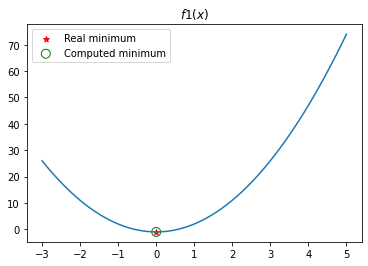

In [5]:
def f1(x): return 3*x**2 - 1

a, b = -3, 5
interval_length = 0.001
epsilon = 0.0001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = dichotomic_search(f1, a, b, interval_length, epsilon)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

plot_solution_2d(f1, real_minimum, computed_minimum)

## Búsqueda Sección Áurea

A continuación, se muestra a través del mismo ejemplo, el problema de minimización de búsqueda sección aurea utilizando la función *golden_search* implementado en *search_methods.py*.

Minimum value at (-0.0006, 0.0003) after 19 iteration computed in 0.0001 seconds.


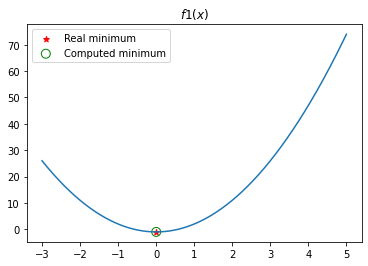

In [6]:
a, b = -3, 5
interval_length = 0.001

start_time = timeit.default_timer()
lower_bound, upper_bound, total_it = golden_search(f1, a, b, interval_length)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at ({lower_bound:.4f}, {upper_bound:.4f}) after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = (upper_bound-lower_bound)/2
real_minimum = 0.0

plot_solution_2d(f1, real_minimum, computed_minimum)

# Tarea 2
- Codificar el método de Hooke y Jeeves.
- Codificar el método del gradiente

In [7]:
from opt_search import HJ_search

In [8]:
def plot_solution_3d(func, real_minimum, computed_minimum, a = -100, b = 100):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    xline = np.linspace(a, b, 1000)
    yline = np.linspace(a, b, 1000)
    x = np.array(list(zip(xline,yline)))
    zline = list(map(func, x))

    ax.plot3D(xline, yline, zline)
    plt.title(r"$f2(x)$")
    ax.scatter3D(real_minimum[0], real_minimum[1], func(real_minimum), color="red", marker="*", label="Real minimum")
    ax.scatter3D(computed_minimum[0], computed_minimum[1], func(computed_minimum),  color="green", s = 80, facecolor = 'none', marker="o", label="Computed minimum")
    plt.legend(loc = 'best')
    plt.show()

## Método de Hooke y Jevees

Se muestra, a través de un ejemplo, el método de optimización de Hooke y Jevees implementado como *HJ_search* en *search_methods.py*. 

Para la búsqueda del $\lambda$ mínimo en los pasos 1 y 2 del algoritmo visto en clase, se utiliza una variante del método que utiliza dos parámetro complementarios: $\beta$ y $\alpha$ que miden la tasa de reducción y el factor de aceleración del algorito respectivamente.

La función a minimizar es la siguiente parábola aplanada:

$$f_2(x)= (x_1-2)^4 + (x_1 - 2x_2)^2$$

In [9]:
def f2(x):
    return (x[0]-2)**4 + (x[0] - 2*x[1])**2

Minimum value at [2.09633789 1.04868164] after 56 iteration computed in 0.0058 seconds.


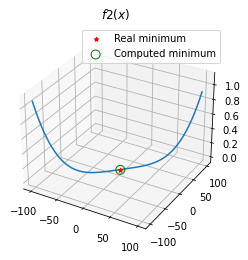

In [10]:
start_time = timeit.default_timer()
xk_min , total_it = HJ_search(f2, x0 = np.array([0, 3]), lambd = 3.3)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

plot_solution_3d(f2, real_minimum, computed_minimum)

# Tarea 3

- Codificar el método de Newton (multivariante).


In [11]:
from opt_search import newton_search

## Método Newton (multivariante)
Se prueba el método de optimización de Newton multivariante implementado como *newton_search* en *search_methods.py*, utilizando de nuevo la función $f_2$ a minimizar.

Para ello, es necesario calcular el Hessiano de $f_2$:

$$\nabla {f_2}(x) = (4(x_1-2)^3+2(x_1-2x_2), -4(x_1-2x_2))$$


$$H f_2(x) = \begin{pmatrix} 12(x-2)^2+2 & -4\\
                            -4 & 8
                \end{pmatrix}$$


In [12]:
def grad_f2(x):
    return np.array([4*(x[0]-2)**3 + 2*(x[0]-2*x[1]), -4*(x[0]-2*x[1])], dtype=np.float64)
    

def H_f2(x):
    return np.matrix([[12*(x[0]-2)**2 + 2, -4], [-4, 8]], dtype=np.float64)

Minimum value at [1.99997653 0.99998827] after 56 iteration computed in 0.0046 seconds.


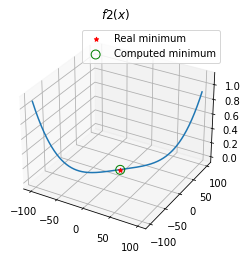

In [13]:
start_time = timeit.default_timer()
xk_min, it = newton_search(grad_f2, H_f2, x0 = np.array([0, 3]))
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

plot_solution_3d(f2, real_minimum, computed_minimum)

# Tarea 4
- Codificar el método de Davidon-Fletcher-Powell.

In [14]:
from opt_search import DFP_search

Minimum value at [1.98843447 0.99421724] after 56 iteration computed in 0.0300 seconds.


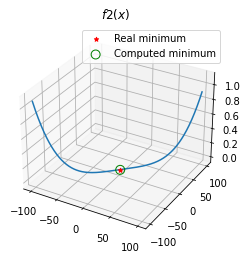

In [16]:
start_time = timeit.default_timer()
xk_min, it = DFP_search(grad_f2, x0 = np.array([0, 3]))
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

plot_solution_3d(f2, real_minimum, computed_minimum)

In [83]:
from opt_search import fletcher_reeves

1 0.009641811617123405
2 1.5e-06
1 0.00418504215027781
2 1.4976974788247772e-06
1 0.0023191600338771487
2 1.4966999527035939e-06
1 0.0014694512119867637
2 1.4961472987748151e-06
1 0.001013169299404061
2 1.4957970751473334e-06
1 0.0007403835580265211
2 1.4955555383463723e-06
1 0.0005644937704184724
2 1.4953789851851227e-06
1 0.0004445308422613283
2 1.4952443402482071e-06
1 0.0003590847864250049
2 1.495138284029855e-06
1 0.0002960861775866393
2 1.4950525949864134e-06
1 0.00024831242919395554
2 1.494981925543784e-06
1 0.00021122740275200064
2 1.4949226481272884e-06
1 0.00018186610866388175
2 1.4948722155377414e-06
1 0.00015822435512317476
2 1.494828786846089e-06
1 0.0001389080654912412
2 1.494790998596276e-06
1 0.00012292329558330066
2 1.4947578195007805e-06
1 0.00010954595740479492
2 1.4947284551340201e-06
1 9.82384625216402e-05
2 1.4947022836480352e-06
1 8.859492400192777e-05
2 1.494678811339638e-06
1 8.030425993600171e-05
2 1.4946576412691638e-06
1 7.312481484001188e-05
2 1.49463845066

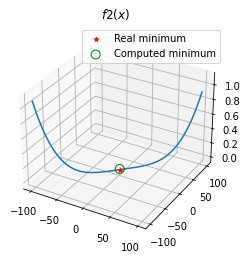

In [87]:
start_time = timeit.default_timer()
xk_min, total_it = fletcher_reeves(grad_f2, x0 = np.array([0, 3]), epsilon=1e-8, max_iter=100, tolerance=5e-6)
search_time = timeit.default_timer() - start_time

print(f'Minimum value at {xk_min} after {total_it} iteration computed in {search_time:.4f} seconds.')

computed_minimum = xk_min
real_minimum = np.array([2.0, 1.0])

plot_solution_3d(f2, real_minimum, computed_minimum)